In [2]:
%pylab inline
import os
import sys
import glob
import time
import datetime
import numpy as np
plt.style.use('ggplot')

import matplotlib.pyplot as plt


try:
    import sqlite3
except ImportError:
    print ('you need sqlite3 installed to use this program')
    sys.exit(0)


def encode_string(s):
    """
    Simple utility function to make sure a string is proper
    to be used in a SQLite query
    (different than posgtresql, no N to specify unicode)
    EXAMPLE:
      That's my boy! -> 'That''s my boy!'
    """
    return "'"+s.replace("'","''")+"'"




Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display

In [17]:
# requires extra forwardslash, //<hostname/<path>/....
metadata_eng = create_engine('sqlite:////git/million_songs/data/track_metadata.db')
lastfm_tag_eng = create_engine('sqlite:////git/million_songs/data/lastfm_tags.db')



In [16]:
metadata = pd.read_sql_query('SELECT title, song_id, artist_name, duration, year FROM songs', metadata_eng)


In [21]:
lastfm = pd.read_sql_query('SELECT * FROM sqlite_master where type="table"', lastfm_tag_eng)
lastfm



,type,name,tbl_name,rootpage,sql
0,table,tags,tags,2,CREATE TABLE tags (tag TEXT)
1,table,tids,tids,3,CREATE TABLE tids (tid TEXT)
2,table,tid_tag,tid_tag,4,"CREATE TABLE tid_tag (tid INT, tag INT, val FL..."


In [45]:
lastfm = pd.read_sql_query('SELECT * FROM tids', lastfm_tag_eng)
lastfm




,tid
0,TRCCCYE12903CFF0E9
1,TRCCCFH12903CEBC70
2,TRCCCJT128F429FFF6
3,TRCCCBJ128F4286E6F
4,TRCCJTI128EF35394A
5,TRCCJTD12903CB62E6
6,TRCCJKN128F426E04D
7,TRCCJPH128F42535FC
8,TRCCIHO128F1466B53
9,TRCCILA128F42BA535


In [46]:
tag = 'Acid Smurfs'
tid = 'TRCCCJT128F429FFF6'

sql = "SELECT tids.tid, tags.tag, tid_tag.val FROM tid_tag, tids, tags WHERE tags.ROWID=tid_tag.tag AND tid_tag.tid=tids.ROWID and tids.tid='%s'" % tid


In [47]:
lastfm = pd.read_sql_query(sql, lastfm_tag_eng)
lastfm.head()

,tid,tag,val
0,TRCCCJT128F429FFF6,pop,100
1,TRCCCJT128F429FFF6,70s,33
2,TRCCCJT128F429FFF6,Middle of the road,33
3,TRCCCJT128F429FFF6,Bonjour ca va,33


In [120]:
df.head()

,title,song_id,artist_name,duration,year
0,Silent Night,SOQMMHC12AB0180CB8,Faster Pussy cat,252.05506,2003
1,Tanssi vaan,SOVFVAK12A8C1350D9,Karkkiautomaatti,156.55138,1995
2,No One Could Ever,SOGTUKN12AB017F4F1,Hudson Mohawke,138.97098,2006
3,Si Vos Querés,SOBNYVR12A8C13558C,Yerba Brava,145.05751,2003
4,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Der Mystic,514.29832,0


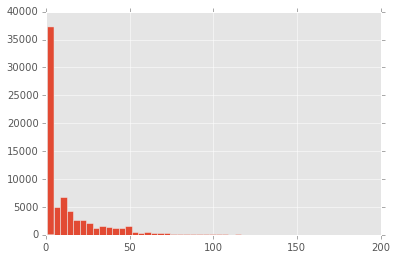

In [11]:
df.groupby('artist_name').count().sort_values('title', ascending=False)['title'].hist(bins=50)

In [12]:
df.groupby('artist_name').agg(['mean', 'median'])['duration'].sort_values('median')

,mean,median
artist_name,,
Helmut Zacharias - Geige Violin - And His Orchestra,0.417510,0.417510
Las Pajarillas,0.417510,0.417510
Zeta Funk,0.443630,0.443630
Trulz & Robin feat. Baseman,0.469750,0.469750
Trío Trovarroco,0.469750,0.469750
Polo Polo,0.495870,0.495870
Grupo Maravilla,0.495870,0.495870
The George Benson Quartet,0.495875,0.495875
Alma Ritano,0.522000,0.522000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11894a160>]], dtype=object)

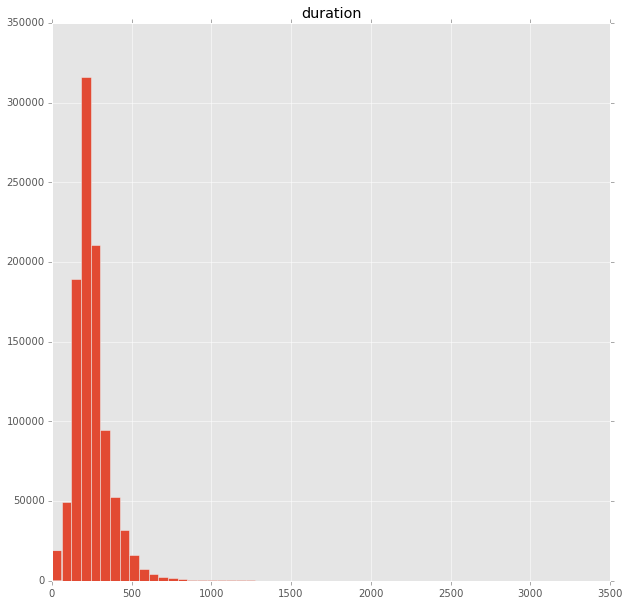

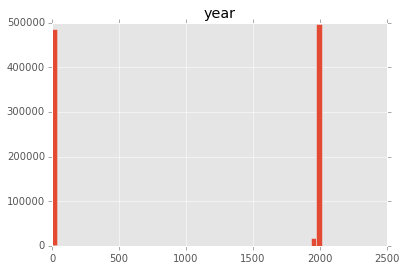

In [48]:
df.hist('duration', bins=50, figsize=(10,10))
df.hist('year', bins=50)

In [18]:
plays = pd.read_csv('/Users/agonzales/git/million_songs/data/train_triplets.txt', delim_whitespace=True,
                   header=None)
plays.columns = ['user', 'song', 'play_count']

In [20]:
plays.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [21]:
gb = plays.groupby('user')

In [43]:
pc = gb.sum()

In [44]:
pc.columns = ['play_sum']


In [45]:
pc.reset_index().head()

,user,play_sum
0,00000b722001882066dff9d2da8a775658053ea0,13
1,00001638d6189236866af9bbf309ae6c2347ffdc,56
2,0000175652312d12576d9e6b84f600caa24c4715,19
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,25
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,27


In [56]:
plays = pd.merge(plays, pc.reset_index())

In [58]:
plays['pc_norm'] = plays.play_count / plays.play_sum

In [60]:
plays.sort_values('pc_norm', ascending=False)

,user,song,play_count,play_sum,pc_norm
33904324,10255361c97f09fec1a09abf1c472ae5b8f3491f,SOYRIKA12A6D4F93D9,1725,1761,0.979557
45077368,16685fea153f1b5bbfd200a2c3ccba21c4b4d17f,SODIOKO12A6D4F79B6,783,802,0.976309
4065093,0087a847facf63c5c9c2dde17946725030e10c36,SOLRVHB12A582A28FA,396,411,0.963504
5738307,ebed4965c03cb572d599bd851108e7ff320c287e,SOGVKZV12A8C143863,2130,2212,0.962929
45406635,592328ac6cf2d7aaa2bbb7adbbc98ba44b6d6e32,SOEPZQS12A8C1436C7,254,264,0.962121
22869166,4e425fb4a81dc667d7eb93b732bf7ec50ec3c264,SOJDPRJ12A58A7A568,628,653,0.961715
25846822,780913e6a5d61405f4653aef0231876e6721120b,SOKNMJE12A67AE0421,1369,1430,0.957343
31819464,0cf51a8e9e030e0dc834352ad4706517d8123d1c,SOCFNLP12A58A7D730,343,359,0.955432
43301442,a0d8da96d33ba93b43ece4048d861d757f6db850,SOUFTBI12AB0183F65,365,384,0.950521
26671783,ab330a39eff298926b41667630a2010c5fa13eda,SOMEFSQ12A6D4F6A4F,354,373,0.949062


In [61]:
df[df.song_id == 'SOYRIKA12A6D4F93D9']

,title,song_id,artist_name,duration,year
665874,The Bar Is A Beautiful Place,SOYRIKA12A6D4F93D9,Ryan Adams,357.61587,2001


In [62]:
df[df.song_id == 'SODIOKO12A6D4F79B6']

,title,song_id,artist_name,duration,year
126950,Soul Survivor,SODIOKO12A6D4F79B6,Young Jeezy / Akon,280.34567,0


In [104]:
df[df.song_id == 'SOAUWYT12A81C206F1']

,title,song_id,artist_name,duration,year
111102,Undo,SOAUWYT12A81C206F1,Björk,348.57751,2001


In [69]:
plays.head()

,user,song,play_count,play_sum,pc_norm
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,142,0.007042
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,142,0.007042
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,142,0.014085
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,142,0.007042
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,142,0.007042


In [97]:
songs = plays.groupby('song')['play_count', 'play_sum', 'pc_norm'].sum()

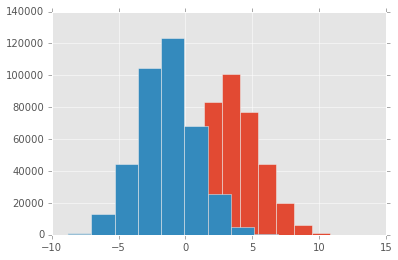

In [111]:
np.log(songs.reset_index()['play_count']).hist()
np.log(songs.reset_index()['pc_norm']).hist()

In [103]:
songs['play_count'].sort_values(ascending=False).head(15)

song
SOBONKR12A58A7A7E0    726885
SOAUWYT12A81C206F1    648239
SOSXLTC12AF72A7F54    527893
SOFRQTD12A81C233C0    425463
SOEGIYH12A6D4FC0E3    389880
SOAXGDH12A8C13F8A1    356533
SONYKOW12AB01849C9    292642
SOPUCYA12A8C13A694    274627
SOUFTBI12AB0183F65    268353
SOVDSJC12A58A7A271    244730
SOOFYTN12A6D4F9B35    241669
SOHTKMO12AB01843B0    236494
SOBOUPA12A6D4F81F1    225652
SODJWHY12A8C142CCE    209212
SOLFXKT12AB017E3E0    197181
Name: play_count, dtype: int64

In [119]:
for song in songs['play_count'].sort_values(ascending=False).head(50).reset_index()['song'].values:
    print(df[df.song_id == song][['title', 'artist_name']].values)

[["You're The One" 'Dwight Yoakam']]
[['Undo' 'Björk']]
[['Revelry' 'Kings Of Leon']]
[['Sehr kosmisch' 'Harmonia']]
[['Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)'
  'Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner']]
[['Dog Days Are Over (Radio Edit)' 'Florence + The Machine']]
[['Secrets' 'OneRepublic']]
[['Canada' 'Five Iron Frenzy']]
[['Invalid' 'Tub Ring']]
[["Ain't Misbehavin" 'Sam Cooke']]
[['Représente' 'Alliance Ethnik']]
[['Catch You Baby (Steve Pitron & Max Sanna Radio Edit)' 'Lonnie Gordon']]
[['Sincerité Et Jalousie' 'Alliance Ethnik']]
[['Hey_ Soul Sister' 'Train']]
[['Fireflies' 'Charttraxx Karaoke']]
[['The Gift' 'Angels and Airwaves']]
[['Tive Sim' 'Cartola']]
[['Marry Me' 'Train']]
[["I CAN'T GET STARTED" 'Ron Carter']]
[['Drop The World' 'Lil Wayne / Eminem']]
[['OMG' 'Usher featuring will.i.am']]
[['Make Love To Your Mind' 'Bill Withers']]
[['Use Somebody' 'Kings Of Leon']
 ['Use Somebody' 'Kings Of Leon']]
[['Mercy:Th

In [118]:
for song in songs['pc_norm'].sort_values(ascending=False).head(50).reset_index()['song'].values:
    print(df[df.song_id == song][['title', 'artist_name']].values)

[["You're The One" 'Dwight Yoakam']]
[['Undo' 'Björk']]
[['Sehr kosmisch' 'Harmonia']]
[['Revelry' 'Kings Of Leon']]
[['Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)'
  'Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner']]
[['Dog Days Are Over (Radio Edit)' 'Florence + The Machine']]
[['Secrets' 'OneRepublic']]
[['Invalid' 'Tub Ring']]
[['Tive Sim' 'Cartola']]
[['Canada' 'Five Iron Frenzy']]
[['Hey_ Soul Sister' 'Train']]
[["Ain't Misbehavin" 'Sam Cooke']]
[['Catch You Baby (Steve Pitron & Max Sanna Radio Edit)' 'Lonnie Gordon']]
[['Représente' 'Alliance Ethnik']]
[['Fireflies' 'Charttraxx Karaoke']]
[['Sincerité Et Jalousie' 'Alliance Ethnik']]
[['Marry Me' 'Train']]
[['Drop The World' 'Lil Wayne / Eminem']]
[['OMG' 'Usher featuring will.i.am']]
[['The Gift' 'Angels and Airwaves']]
[['Use Somebody' 'Kings Of Leon']
 ['Use Somebody' 'Kings Of Leon']]
[["I CAN'T GET STARTED" 'Ron Carter']]
[['Billionaire [feat. Bruno Mars]  (Explicit Album Vers

In [66]:
data_store = './million_songs/data/MillionSongSubset/data/A/A/B/TRAABCL128F4286650.h5'

In [77]:
with pd.HDFStore(data_store) as hdf:
    df_reader = hdf.select('analysis/songs')
df_reader

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,f853c665c52f2ea69211840de3ba07e1,0,245.21098,0.357,0,0,0,0,0,...,7,0.07,-7.545,1,0.686,227.48,117.975,4,0.835,TRAABCL128F4286650


In [79]:
print(pd.read_hdf('./million_songs/data/MillionSongSubset/data/A/A/A/TRAAAAW128F429D538.h5', 'analysis/songs'))

   analysis_sample_rate                         audio_md5  danceability  \
0                 22050  a222795e07cd65b7a530f1346f520649             0   

    duration  end_of_fade_in  energy  idx_bars_confidence  idx_bars_start  \
0  218.93179           0.247       0                    0               0   

   idx_beats_confidence  idx_beats_start         ...          key  \
0                     0                0         ...            1   

   key_confidence  loudness  mode  mode_confidence  start_of_fade_out   tempo  \
0           0.736   -11.197     0            0.636            218.932  92.198   

   time_signature  time_signature_confidence            track_id  
0               4                      0.778  TRAAAAW128F429D538  

[1 rows x 31 columns]


In [55]:
import os
import glob
import hdf5_getters


def count_all_files(basedir,ext='.h5') :
    cnt = 0
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        cnt += len(files)
    return cnt

def get_all_titles(basedir,ext='.h5') :
    titles = []
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files:
            h5 = hdf5_getters.open_h5_file_read(f)
            titles.append( hdf5_getters.get_title(h5) )
            h5.close()
    return titles

ImportError: No module named 'hdf5_getters'

In [53]:
count_all_files('./million_songs/data/MillionSongSubset/')

10001

In [54]:
get_all_titles('./million_songs/data/MillionSongSubset/')

NameError: name 'hdf5_getters' is not defined